## Exploratory analysis for Roller-coaster Dataset

To evaluate this dataset and explore it drawing the right conclusions, we need to import the necessary libraries

#### Import Libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use("ggplot")
pd.set_option('display.max_columns', 200)

In [85]:
import ydata_profiling

#### Import dataset and explore

In [86]:
roller = pd.read_csv("coaster_db.csv")

In [87]:
roller.shape

(1087, 56)

- Data have 56 features and 1087 inputs. In other words, 1087 rows and 56 columns.

In [88]:
roller.head(10)

coaster_name            Length             Speed  \
0                      Switchback Railway    600 ft (180 m)  6 mph (9.7 km/h)   
1                       Flip Flap Railway               NaN               NaN   
2  Switchback Railway (Euclid Beach Park)               NaN               NaN   
3            Loop the Loop (Coney Island)               NaN               NaN   
4            Loop the Loop (Young's Pier)               NaN               NaN   
5                          Cannon Coaster               NaN               NaN   
6                           Leap-The-Dips  1,452 ft (443 m)  10 mph (16 km/h)   
7        Figure Eight (Euclid Beach Park)               NaN               NaN   
8                            Drop the Dip               NaN               NaN   
9      Scenic Railway (Euclid Beach Park)               NaN               NaN   

                         Location     Status   Opening date  \
0                    Coney Island    Removed  June 16, 1884   
1                   Sea Lion Park    Removed           1895   
2  Cleveland, Ohio, United States     Closed            NaN   
3                           Other    Removed           1901   
4                           Other    Removed           1901   
5                    Coney Island    Removed           1902   
6                   Lakemont Park  Operating           1902   
7  Cleveland, Ohio, United States     Closed            NaN   
8                    Coney Island    Removed   June 6, 1907   
9  Cleveland, Ohio, United States     Closed            NaN   

                   Type                  Manufacturer Height restriction  \
0                  Wood        LaMarcus Adna Thompson                NaN   
1                  Wood                  Lina Beecher                NaN   
2                 Other                           NaN                NaN   
3                 Steel                Edwin Prescott                NaN   
4                 Steel                Edwin Prescott                NaN   
5                  Wood          George Francis Meyer                NaN   
6  Wood – Side friction  Federal Construction Company                NaN   
7                 Other                           NaN                NaN   
8                 Other                 Arthur Jarvis                NaN   
9                 Other                           NaN                NaN   

         Model        Height  Inversions Lift/launch system Cost  \
0  Lift Packed  50 ft (15 m)         NaN            gravity  NaN   
1          NaN           NaN         1.0                NaN  NaN   
2          NaN           NaN         NaN                NaN  NaN   
3          NaN           NaN         1.0                NaN  NaN   
4          NaN           NaN         1.0                NaN  NaN   
5          NaN  40 ft (12 m)         NaN                NaN  NaN   
6          NaN  41 ft (12 m)         NaN                NaN  NaN   
7          NaN           NaN         NaN                NaN  NaN   
8          NaN  60 ft (18 m)         NaN                NaN  NaN   
9          NaN           NaN         NaN                NaN  NaN   

                                              Trains  \
0                                                NaN   
1  a single car. Riders are arranged 1 across in ...   
2                                                NaN   
3  a single car. Riders are arranged 2 across in ...   
4                                                NaN   
5                                                NaN   
6                                                NaN   
7                                                NaN   
8                                                NaN   
9                                                NaN   

                Park section             Duration              Capacity  \
0  Coney Island Cyclone Site                 1:00  1600 riders per hour   
1                        NaN                  NaN                   NaN   
2              

- It seems that there are a lot of NaN values.
- Dataset require cleaning
- But firstly, lets check the data type

In [89]:
roller.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

- Additionally many features are reported as objects but they are indegers. Thus, we need to change their type and probably the feature name to avoid spaces.

In [90]:
roller.describe()

Inversions  year_introduced    latitude   longitude  speed1_value  \
count  932.000000      1087.000000  812.000000  812.000000    937.000000   
mean     1.547210      1994.986201   38.373484  -41.595373     53.850374   
std      2.114073        23.475248   15.516596   72.285227     23.385518   
min      0.000000      1884.000000  -48.261700 -123.035700      5.000000   
25%      0.000000      1989.000000   35.031050  -84.552200     40.000000   
50%      0.000000      2000.000000   40.289800  -76.653600     50.000000   
75%      3.000000      2010.000000   44.799600    2.778100     63.000000   
max     14.000000      2022.000000   63.230900  153.426500    240.000000   

        speed_mph  height_value   height_ft  Inversions_clean  Gforce_clean  
count  937.000000    965.000000  171.000000       1087.000000    362.000000  
mean    48.617289     89.575171  101.996491          1.326587      3.824006  
std     16.678031    136.246444   67.329092          2.030854      0.989998  
min      5.000000      4.000000   13.100000          0.000000      0.800000  
25%     37.300000     44.000000   51.800000          0.000000      3.400000  
50%     49.700000     79.000000   91.200000          0.000000      4.000000  
75%     58.000000    113.000000  131.200000          2.000000      4.500000  
max    149.100000   3937.000000  377.300000         14.000000     12.000000

- With describe we can take a glams of statistics within the dataset
- For instance in height_ft 362/1087 values are reported. 


#### Data preparation and cleaning

In [91]:
roller.head()

coaster_name          Length             Speed  \
0                      Switchback Railway  600 ft (180 m)  6 mph (9.7 km/h)   
1                       Flip Flap Railway             NaN               NaN   
2  Switchback Railway (Euclid Beach Park)             NaN               NaN   
3            Loop the Loop (Coney Island)             NaN               NaN   
4            Loop the Loop (Young's Pier)             NaN               NaN   

                         Location   Status   Opening date   Type  \
0                    Coney Island  Removed  June 16, 1884   Wood   
1                   Sea Lion Park  Removed           1895   Wood   
2  Cleveland, Ohio, United States   Closed            NaN  Other   
3                           Other  Removed           1901  Steel   
4                           Other  Removed           1901  Steel   

             Manufacturer Height restriction        Model        Height  \
0  LaMarcus Adna Thompson                NaN  Lift Packed  50 ft (15 m)   
1            Lina Beecher                NaN          NaN           NaN   
2                     NaN                NaN          NaN           NaN   
3          Edwin Prescott                NaN          NaN           NaN   
4          Edwin Prescott                NaN          NaN           NaN   

   Inversions Lift/launch system Cost  \
0         NaN            gravity  NaN   
1         1.0                NaN  NaN   
2         NaN                NaN  NaN   
3         1.0                NaN  NaN   
4         1.0                NaN  NaN   

                                              Trains  \
0                                                NaN   
1  a single car. Riders are arranged 1 across in ...   
2                                                NaN   
3  a single car. Riders are arranged 2 across in ...   
4                                                NaN   

                Park section Duration              Capacity G-force  \
0  Coney Island Cyclone Site     1:00  1600 riders per hour     2.9   
1                        NaN      NaN                   NaN      12   
2                        NaN      NaN                   NaN     NaN   
3                        NaN      NaN                   NaN     NaN   
4                        NaN      NaN                   NaN     NaN   

                 Designer Max vertical angle          Drop Soft opening date  \
0  LaMarcus Adna Thompson                30°  43 ft (13 m)               NaN   
1            Lina Beecher                NaN           NaN               NaN   
2                     NaN                NaN           NaN               NaN   
3         Edward A. Green                NaN           NaN               NaN   
4         Edward A. Green                NaN           NaN               NaN   

  Fast Lane available            Replaced            Track layout  \
0                 NaN                 NaN  Gravity pulled coaster   
1                 NaN                 NaN                     NaN   
2                 NaN                 NaN                     NaN   
3                 NaN  Switchback Railway                     NaN   
4                 NaN                 NaN                     NaN   

  Fastrack available Soft opening date.1 Closing date Opened  Replaced by  \
0                NaN                 NaN          NaN    NaN          NaN   
1                NaN                 NaN         1902    NaN          NaN   
2                NaN                 NaN          NaN   1895          NaN   
3                NaN                 NaN         1910    NaN  Giant Racer   
4                NaN                 NaN         1912    NaN          NaN   

  Website Flash Pass Available Must transfer from wheelchair Theme  \
0     NaN                  NaN                           NaN   NaN   
1     NaN                  NaN                           NaN   NaN   
2     NaN                  NaN                           NaN   NaN   
3     NaN                  NaN              

In [92]:
#Example of dropping columns
#roller3 = roller.drop(["Opening date"],axis=1)

In [93]:
#Subset the datasets
roller2 = roller[['coaster_name', 
        #'Length', 'Speed', 
        'Location', 'Status', 
        #'Opening date',
        #'Type', 
       'Manufacturer',
       #'Height restriction', 'Model', 'Height',
       #'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       #'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       #'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       #'Track layout', 'Fastrack available', 'Soft opening date.1',
       #'Closing date', 
       'Opened', 
       #'Replaced by', 'Website',
       #'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       #'Single rider line available', 'Restraint Style',
       #'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean',
       #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
       #'height_value', 'height_unit', 
       'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [94]:
roller2.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
Opened                 object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [95]:
#Convert column to datetime
roller2["opening_date_clean"] = pd.to_datetime(roller2["opening_date_clean"])
roller2.dtypes

coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
Opened                        object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

In [96]:
roller2.head()

coaster_name                        Location  \
0                      Switchback Railway                    Coney Island   
1                       Flip Flap Railway                   Sea Lion Park   
2  Switchback Railway (Euclid Beach Park)  Cleveland, Ohio, United States   
3            Loop the Loop (Coney Island)                           Other   
4            Loop the Loop (Young's Pier)                           Other   

    Status            Manufacturer Opened  year_introduced  latitude  \
0  Removed  LaMarcus Adna Thompson    NaN             1884   40.5740   
1  Removed            Lina Beecher    NaN             1895   40.5780   
2   Closed                     NaN   1895             1896   41.5800   
3  Removed          Edwin Prescott    NaN             1901   40.5745   
4  Removed          Edwin Prescott    NaN             1901   39.3538   

   longitude Type_Main opening_date_clean  speed_mph  height_ft  \
0   -73.9780      Wood         1884-06-16        6.0        NaN   
1   -73.9790      Wood         1895-01-01        NaN        NaN   
2   -81.5700     Other                NaT        NaN        NaN   
3   -73.9780     Steel         1901-01-01        NaN        NaN   
4   -74.4342     Steel         1901-01-01        NaN        NaN   

   Inversions_clean  Gforce_clean  
0                 0           2.9  
1                 1          12.0  
2                 0           NaN  
3                 1           NaN  
4                 1           NaN

In [97]:
#Rename columns: 
roller2.columns
roller2 = roller2.rename(columns={'coaster_name':'Coaster_Name',
                        'year_introduced':'Year_Introduced',
                        'latitude':'Latitude',
                        'longitude':'Longitude',
                        'opening_date_clean':'Opening_Date',
                        'speed_mph':'Speed_mph',
                        'height_ft':'Height_ft',
                        'Inversions_clean':'Inversions',
                        'Gforce_clean':'Gforce'})

In [98]:
roller2.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Opened',
       'Year_Introduced', 'Latitude', 'Longitude', 'Type_Main', 'Opening_Date',
       'Speed_mph', 'Height_ft', 'Inversions', 'Gforce'],
      dtype='object')

In [99]:
#Indentify missing values and handle them
#in every single column check the presence of null values
roller2.isna().sum()

Coaster_Name          0
Location              0
Status              213
Manufacturer         59
Opened             1060
Year_Introduced       0
Latitude            275
Longitude           275
Type_Main             0
Opening_Date        250
Speed_mph           150
Height_ft           916
Inversions            0
Gforce              725
dtype: int64

- Before continue with mising values,  there might be data that are duplicated 

In [100]:
#ignores the 1st row of duplicates
roller2.duplicated().sum()

0

In [101]:
roller2.loc[roller2.duplicated()]

Empty DataFrame
Columns: [Coaster_Name, Location, Status, Manufacturer, Opened, Year_Introduced, Latitude, Longitude, Type_Main, Opening_Date, Speed_mph, Height_ft, Inversions, Gforce]
Index: []

In [102]:
#Check duplicates in a subset of the dataframe
roller2.duplicated(subset=['Coaster_Name'])
#come of them are duplicate but let's take a look

0       False
1       False
2       False
3       False
4       False
        ...  
1082     True
1083    False
1084     True
1085    False
1086    False
Length: 1087, dtype: bool

In [103]:
roller2.query('Coaster_Name == "Crystal Beach Cyclone"')
#The following might be the same with the only difference the Year_Introduced. It might be an error of insertion.

Coaster_Name            Location   Status        Manufacturer  \
39  Crystal Beach Cyclone  Crystal Beach Park  Removed  Traver Engineering   
43  Crystal Beach Cyclone  Crystal Beach Park  Removed  Traver Engineering   

   Opened  Year_Introduced  Latitude  Longitude Type_Main Opening_Date  \
39    NaN             1926   42.8617   -79.0598      Wood   1926-01-01   
43    NaN             1927   42.8617   -79.0598      Wood   1926-01-01   

    Speed_mph  Height_ft  Inversions  Gforce  
39       60.0        NaN           0     4.0  
43       60.0        NaN           0     4.0

In [104]:
#With tiltda 
roller3 = roller2.loc[~roller2.duplicated(subset=['Coaster_Name','Location','Opening_Date'])]\
    .reset_index(drop=True).copy()

In [105]:
roller3

Coaster_Name                        Location  \
0                        Switchback Railway                    Coney Island   
1                         Flip Flap Railway                   Sea Lion Park   
2    Switchback Railway (Euclid Beach Park)  Cleveland, Ohio, United States   
3              Loop the Loop (Coney Island)                           Other   
4              Loop the Loop (Young's Pier)                           Other   
..                                      ...                             ...   
985            Ice Breaker (roller coaster)                SeaWorld Orlando   
986                   Leviathan (Sea World)                       Sea World   
987               Pantheon (roller coaster)      Busch Gardens Williamsburg   
988                                 Tumbili                  Kings Dominion   
989          Wonder Woman Flight of Courage        Six Flags Magic Mountain   

                 Status                 Manufacturer Opened  Year_Introduced  \
0               Removed       LaMarcus Adna Thompson    NaN             1884   
1               Removed                 Lina Beecher    NaN             1895   
2                Closed                          NaN   1895             1896   
3               Removed               Edwin Prescott    NaN             1901   
4               Removed               Edwin Prescott    NaN             1901   
..                  ...                          ...    ...              ...   
985  Under construction                Premier Rides    NaN             2022   
986  Under construction           Martin & Vleminckx    NaN             2022   
987  Under construction                      Intamin    NaN             2022   
988  Under construction    S&S – Sansei Technologies    NaN             2022   
989  Under construction  Rocky Mountain Construction    NaN             2022   

     Latitude  Longitude Type_Main Opening_Date  Speed_mph  Height_ft  \
0     40.5740   -73.9780      Wood   1884-06-16        6.0        NaN   
1     40.5780   -73.9790      Wood   1895-01-01        NaN        NaN   
2     41.5800   -81.5700     Other          NaT        NaN        NaN   
3     40.5745   -73.9780     Steel   1901-01-01        NaN        NaN   
4     39.3538   -74.4342     Steel   1901-01-01        NaN        NaN   
..        ...        ...       ...          ...        ...        ...   
985   28.4088   -81.4633     Steel   2022-02-01       52.0        NaN   
986  -27.9574   153.4263      Wood   2022-01-01       49.7      105.0   
987   37.2339   -76.6426     Steel   2022-01-01       73.0        NaN   
988       NaN        NaN     Steel          NaT       34.0        NaN   
989       NaN        NaN     Steel   2022-01-01       58.0        NaN   

     Inversions  Gforce  
0             0     2.9  
1             1    12.0  
2             0     NaN  
3             1     NaN  
4             1     NaN  
..          ...     ...  
985           0     NaN  
986           0     NaN  
987           2     NaN  
988           0     NaN  
989           3     NaN  

[990 rows x 14 columns]

In [106]:
roller3.shape

(990, 14)

## Asking Questions about the data



### What is the distribution of roller coasters' heights (Height_ft) and G-forces experienced on roller coasters (Gforce)?


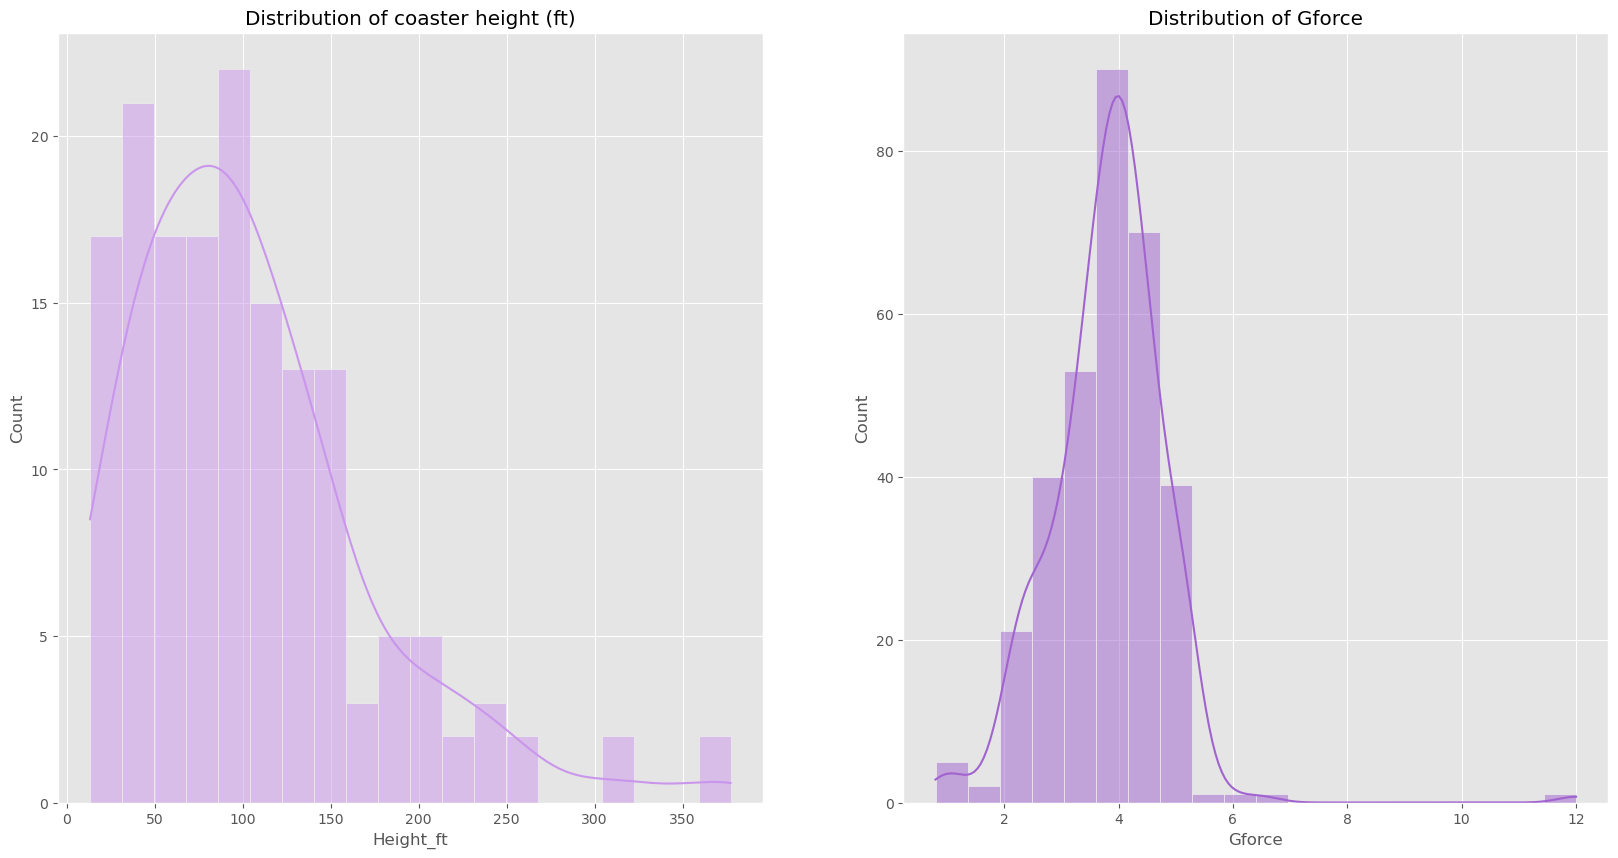

In [135]:
fig, axes = plt.subplots(1, 2, figsize = (20, 10))

sns.histplot(ax = axes[0], x = roller3["Height_ft"],
             bins = 20,
             kde = True,
             cbar = True,
             color = "#CA96EC").set(title = "Distribution of coaster height (ft)");

sns.histplot(ax = axes[1], x = roller3["Gforce"],
             bins = 20,
             cbar = True,
             kde = True,
             color = "#A163CF").set(title = "Distribution of Gforce");



- Coster Height_ft does not follow a normal distribution with many of the coasters having a height_ft between 20-100 and other which seems to be the outliers more than 300 and more than 350

- Gforce somehow follows a more normal distribution with the mean arount Gforce 4.

#### Feature Understanding
- Plot features
- Find relationships
- Distributions and outliers (univariant analysis)

### Which years were the most productive in terms of coaster manufucture?

In [107]:
#Value_counts counts how many values of the same insertion for that specific column are occured 
roller3['Year_Introduced'].value_counts()

1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: Year_Introduced, Length: 101, dtype: int64

Text(0, 0.5, 'Count')

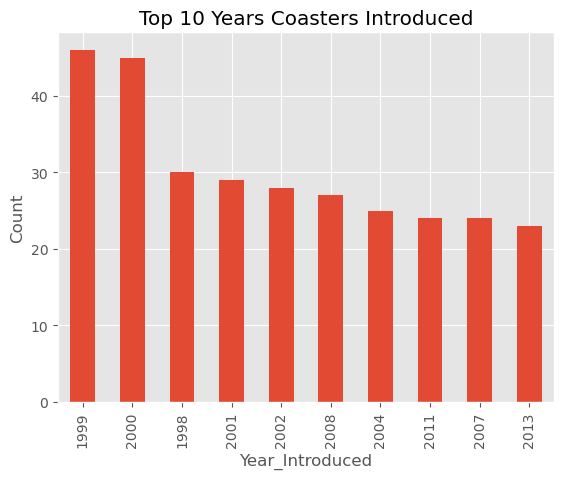

In [108]:
figure1 = roller3['Year_Introduced'].value_counts()\
    .head(10)\
    .plot(kind = 'bar', title= 'Top 10 Years Coasters Introduced')
    
figure1.set_xlabel('Year_Introduced')
figure1.set_ylabel('Count')

### What is the distribution of coaster speed?

Text(0.5, 0, 'Speed (mph)')

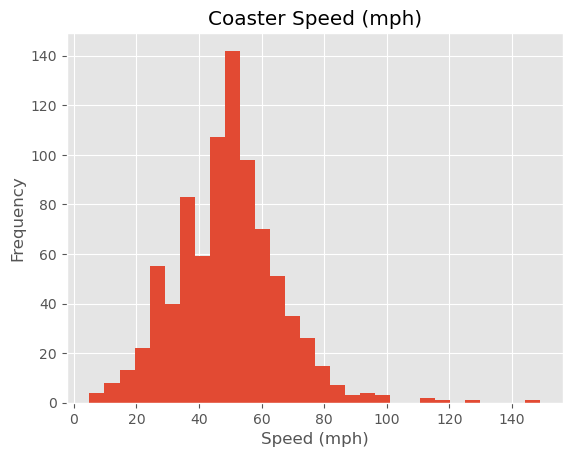

In [109]:
figure2= roller3['Speed_mph'].plot(kind='hist',
                                   bins = 30,
                                   title='Coaster Speed (mph)')

figure2.set_xlabel('Speed (mph)')

Text(0.5, 0, 'Speed (mph)')

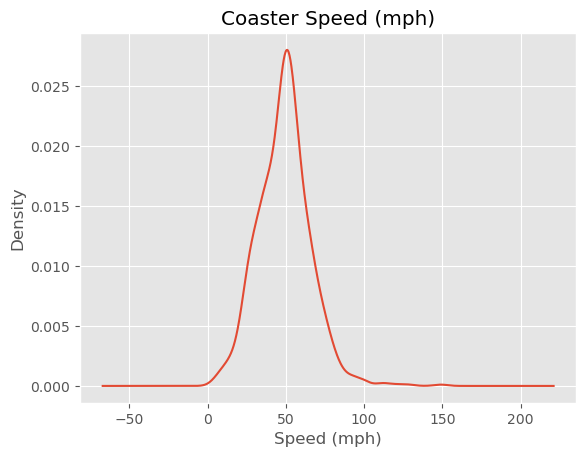

In [110]:
# Density plot
figure3= roller3['Speed_mph'].plot(kind='kde',
                                   title='Coaster Speed (mph)')

figure3.set_xlabel('Speed (mph)')

- Most of the coasters have an average speed of 50-60 mph

In [111]:
# Show distributions for all features using pandas profiling
roller3_profiling = ydata_profiling.ProfileReport(roller3)
roller3_profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

From profiling:
 - Heatmapshows that Speed and Height pf the coaster have strong correlation

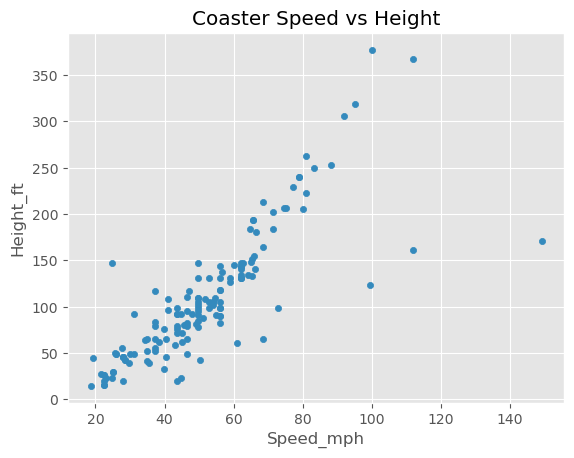

In [112]:
#Feature relationships
figure4= roller3.plot(kind='scatter',
                      x = 'Speed_mph',
                      y = 'Height_ft',
                      title = 'Coaster Speed vs Height')

plt.show()

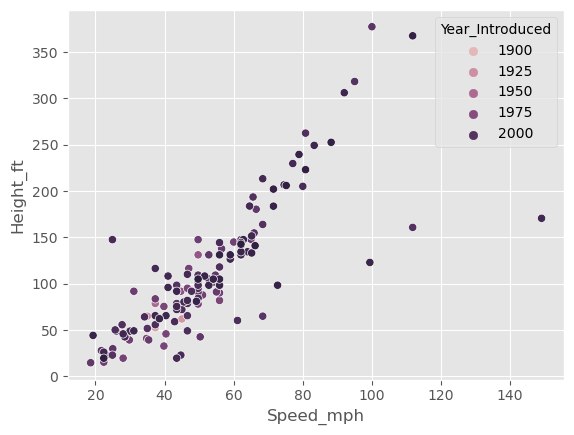

In [113]:
Figure5 = sns.scatterplot(data = roller3,
                x = 'Speed_mph',
                y = 'Height_ft',
                hue= 'Year_Introduced')

In [114]:
roller3.head()

Coaster_Name                        Location  \
0                      Switchback Railway                    Coney Island   
1                       Flip Flap Railway                   Sea Lion Park   
2  Switchback Railway (Euclid Beach Park)  Cleveland, Ohio, United States   
3            Loop the Loop (Coney Island)                           Other   
4            Loop the Loop (Young's Pier)                           Other   

    Status            Manufacturer Opened  Year_Introduced  Latitude  \
0  Removed  LaMarcus Adna Thompson    NaN             1884   40.5740   
1  Removed            Lina Beecher    NaN             1895   40.5780   
2   Closed                     NaN   1895             1896   41.5800   
3  Removed          Edwin Prescott    NaN             1901   40.5745   
4  Removed          Edwin Prescott    NaN             1901   39.3538   

   Longitude Type_Main Opening_Date  Speed_mph  Height_ft  Inversions  Gforce  
0   -73.9780      Wood   1884-06-16        6.0        NaN           0     2.9  
1   -73.9790      Wood   1895-01-01        NaN        NaN           1    12.0  
2   -81.5700     Other          NaT        NaN        NaN           0     NaN  
3   -73.9780     Steel   1901-01-01        NaN        NaN           1     NaN  
4   -74.4342     Steel   1901-01-01        NaN        NaN           1     NaN

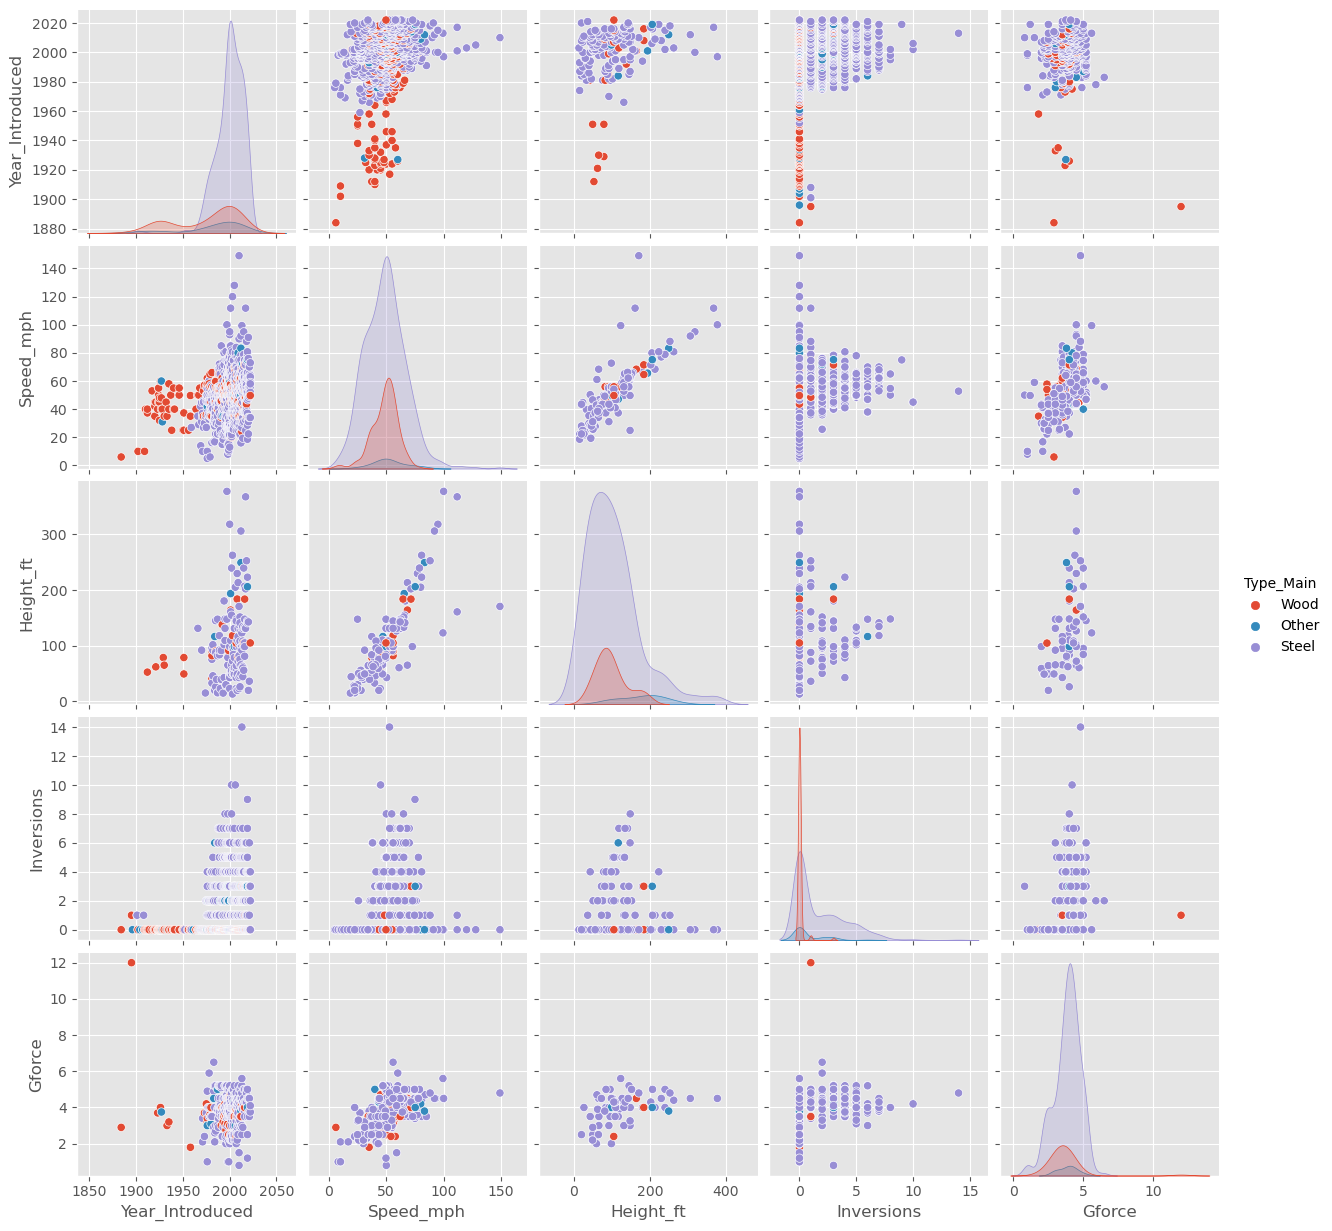

In [115]:
#We can provide more x and y variables
figure6 = sns.pairplot(data = roller3,
                       vars= ['Year_Introduced', 'Speed_mph',
                             'Height_ft','Inversions','Gforce'],
                       hue = 'Type_Main')
plt.show()

- Over the years especially, post-1950 all coasters were made of steel and they became higher and faster
- Additionally, there a clear distrinction between wooden and steel coasters, with steel ones being faster anf larger.
- Post 1960 coaster manufacture have change especially with the use of steel that also aid in increasing the inversions of coasters from 1-2 to 2-10

In [116]:
correlations = roller3[['Year_Introduced', 'Speed_mph',
        'Height_ft','Inversions','Gforce']].dropna().corr()

- Shows the correlation between the numeric values after dropping the null values to show more clearly the relationships

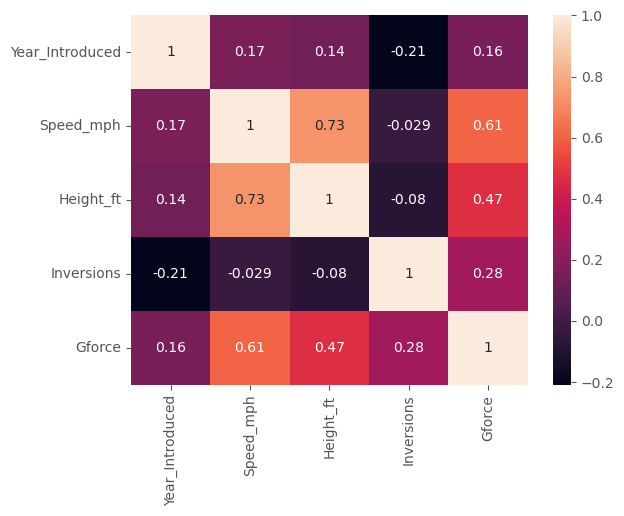

In [117]:
figure7 = sns.heatmap(correlations, annot= True)

- Coaster speed is strongly associated with the coaster's height suggesting that larger/heigher coasters are faster. 
- It is worth noting that Gforce also correlated positively with the coasters speed, which might explain that it's one of the contributory factors for coasters speed.

### Which are the locations with the fastest roller-coasters (min of 10 coasters at that location)?

In [118]:
roller3['Location'].value_counts()
# We don't want to include Other


Other                            181
Kings Island                      19
Cedar Point                       18
Six Flags Magic Mountain          17
Hersheypark                       16
                                ... 
Granada Studios Tour               1
Funtown Splashtown USA             1
Tolchester Beach Park              1
Suzuka, Mie Prefecture, Japan      1
Epcot                              1
Name: Location, Length: 280, dtype: int64

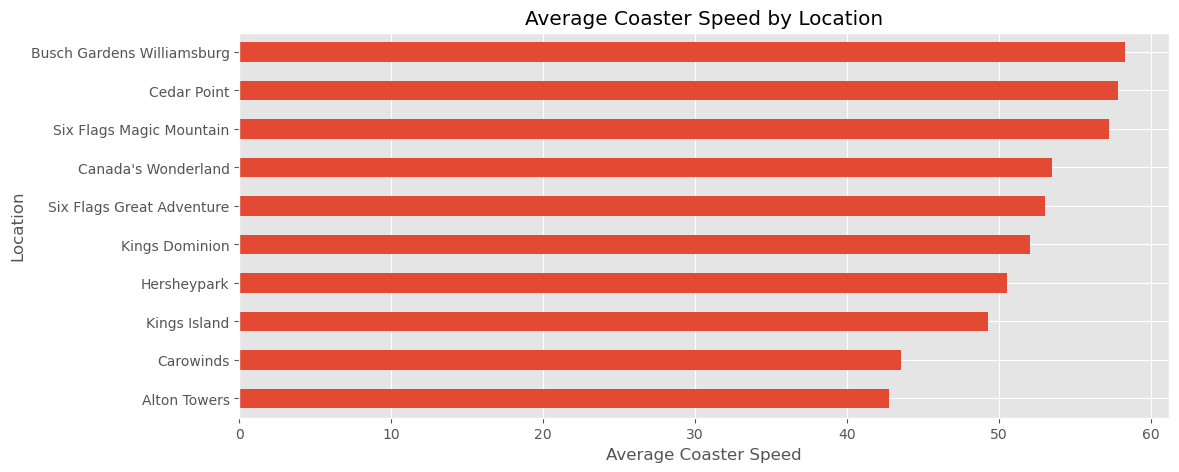

In [119]:
#Filter other those other locations
#Find the averages and count of those coasters
#Filter above 10 coasters
#Sort values by the mean
# and plot
figure8 = roller3.query('Location != "Other"') \
                .groupby('Location')['Speed_mph'] \
                .aggregate(['mean', 'count']) \
                .query('count >= 10') \
                .sort_values('mean')['mean'] \
                .plot(kind='barh', 
                      figsize=(12,5), 
                      title= 'Average Coaster Speed by Location' )
    
figure8.set_xlabel('Average Coaster Speed')
plt.show()


### What is the distribution of roller coasters by location (Location)?


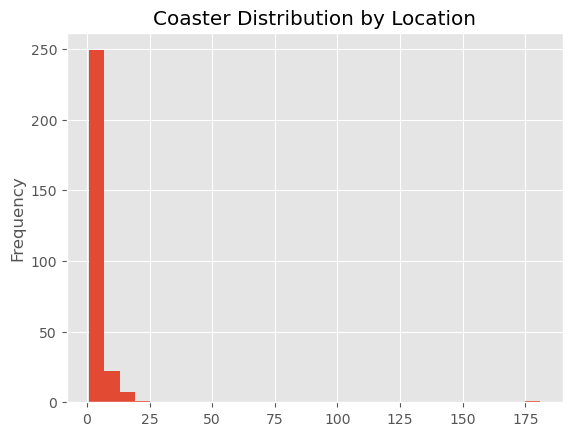

In [120]:
location = roller3['Location'].value_counts() \
    .plot(kind='hist',
          bins = 30,
          title='Coaster Distribution by Location')


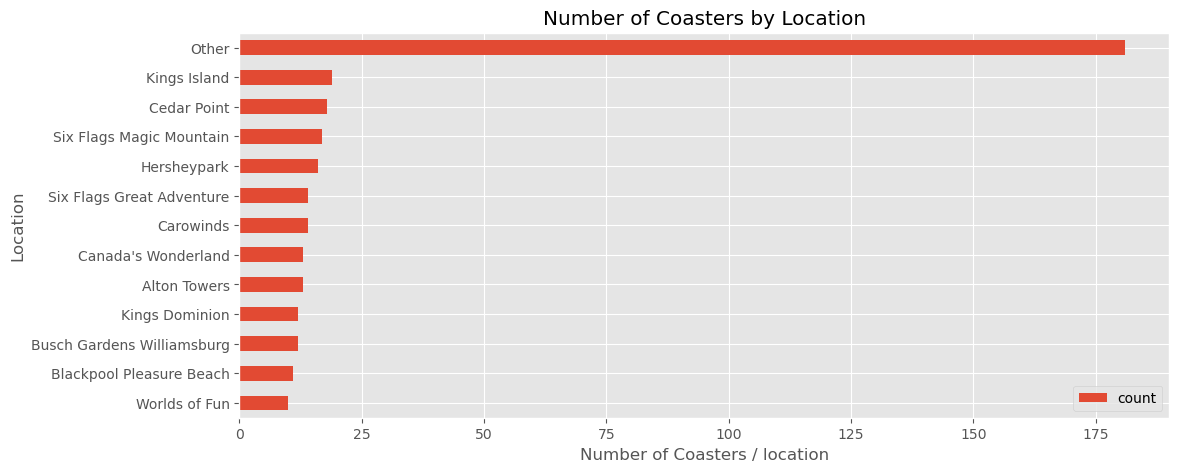

In [121]:
Figure10 = roller3.groupby('Location')['Location'] \
                .aggregate(['count']) \
                .query('count >= 10') \
                .sort_values('count') \
                .plot(kind='barh', 
                      figsize=(12,5), 
                      title= 'Number of Coasters by Location' )
    
Figure10.set_xlabel('Number of Coasters / location')
plt.show()

- More than 175 coaster have been filed in other location
- It would be better to select out that location 

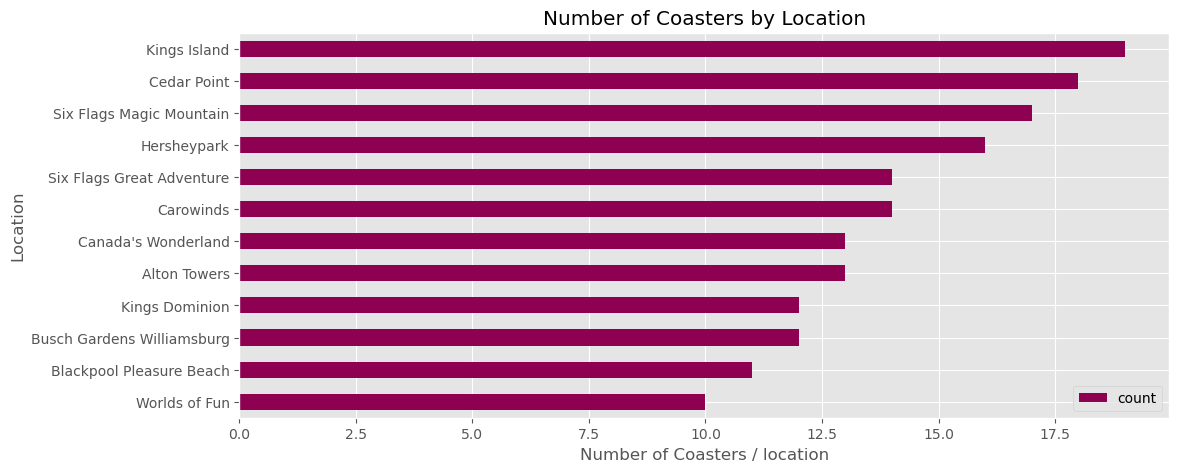

In [122]:
Figure11 = roller3.query('Location != "Other"') \
                .groupby('Location')['Location'] \
                .aggregate(['count']) \
                .query('count >= 10') \
                .sort_values('count') \
                .plot(kind='barh', 
                      figsize=(12,5), 
                      title= 'Number of Coasters by Location',
                      colormap='PiYG')
    
Figure11.set_xlabel('Number of Coasters / location')
plt.show()

- Kings Island, Cedar Point, Six flag magic mountain and Hershaypark have the most roller-coasters. Thus it would be a nive experience to visit if you are a fan of games.

- However some of them migth be closed. This leads us to the next question:

### What is the Status of coasters in the Top 10 couster locations?


In [123]:
roller3['Status'].value_counts()

Operating                                                         646
Removed                                                           133
Closed                                                             23
Under construction                                                 14
In Production                                                      11
Discontinued                                                        7
Chapter 7 bankruptcy; rides dismantled and sold; property sold      2
Not Currently Operating                                             1
closed for maintenance as of july 30 no reopening date known        1
Closed in 2021                                                      1
SBNO December 2019                                                  1
Temporarily Closed                                                  1
SBNO (Standing But Not Operating)                                   1
Temporarily closed                                                  1
Under Maintenance   

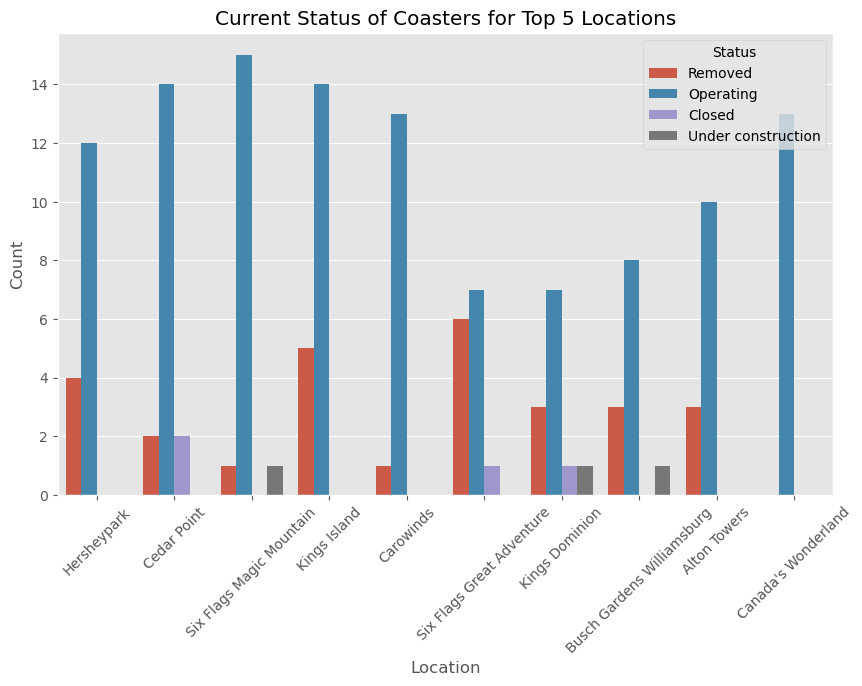

In [124]:
top_locations = roller3.query('Location != "Other"')['Location']\
                .value_counts().head(10).index
filtered_df = roller3[roller3['Location'].isin(top_locations)]

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='Location', hue='Status')
plt.title('Current Status of Coasters for Top 5 Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status', loc='upper right')
plt.show()

- Still in the location of aving the most coasters, most of the are operating. 
- However, in Kings dominion and Six Flags Great Adventure half of the coasters have either being removed closed or under construction.

### Which manufacturer has produced the most roller coasters?


In [125]:
Top_Manufacturers = roller3['Manufacturer'].value_counts().head(10)
Top_Manufacturers

Vekoma                            122
Bolliger & Mabillard              104
Intamin                            84
Mack Rides                         53
Arrow Dynamics                     53
Gerstlauer                         45
Anton Schwarzkopf                  45
Philadelphia Toboggan Coasters     32
Custom Coasters International      30
Rocky Mountain Construction        28
Name: Manufacturer, dtype: int64

- The top 5 coaster manufactarers include Vekoma, Bolliger & Mabillard  , Intamin, Mack Rides, Arrow Dynamics 
- Let's plot the top 10 manufacturers

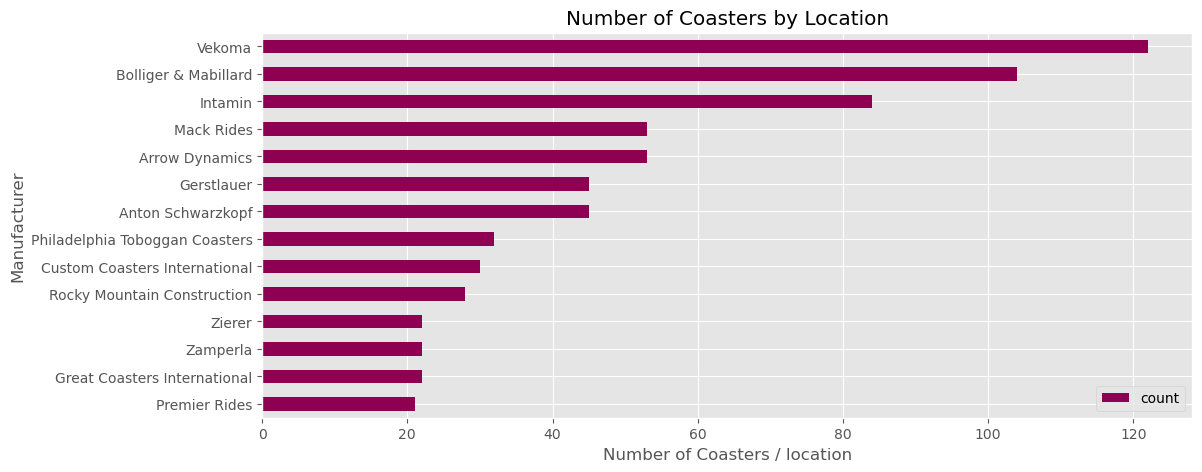

In [134]:
Figure12 = roller3.groupby('Manufacturer')['Manufacturer'] \
                .aggregate(['count']) \
                .query('count > 20') \
                .sort_values('count') \
                .plot(kind='barh', 
                      figsize=(12,5), 
                      title= 'Number of Coasters by Location',
                      colormap='PiYG')
    
Figure12.set_xlabel('Number of Coasters / location')
plt.show()
             

- Vekoma, Bolliger & Mabillard and Intamin are the 3 top coaster manufacturers


In [136]:
roller3.head(10)

Coaster_Name                        Location  \
0                      Switchback Railway                    Coney Island   
1                       Flip Flap Railway                   Sea Lion Park   
2  Switchback Railway (Euclid Beach Park)  Cleveland, Ohio, United States   
3            Loop the Loop (Coney Island)                           Other   
4            Loop the Loop (Young's Pier)                           Other   
5                          Cannon Coaster                    Coney Island   
6                           Leap-The-Dips                   Lakemont Park   
7        Figure Eight (Euclid Beach Park)  Cleveland, Ohio, United States   
8                            Drop the Dip                    Coney Island   
9      Scenic Railway (Euclid Beach Park)  Cleveland, Ohio, United States   

      Status                  Manufacturer Opened  Year_Introduced  Latitude  \
0    Removed        LaMarcus Adna Thompson    NaN             1884   40.5740   
1    Removed                  Lina Beecher    NaN             1895   40.5780   
2     Closed                           NaN   1895             1896   41.5800   
3    Removed                Edwin Prescott    NaN             1901   40.5745   
4    Removed                Edwin Prescott    NaN             1901   39.3538   
5    Removed          George Francis Meyer    NaN             1902   40.5750   
6  Operating  Federal Construction Company    NaN             1902       NaN   
7     Closed                           NaN   1895             1904   41.5800   
8    Removed                 Arthur Jarvis    NaN             1907   40.5744   
9     Closed                           NaN   1895             1907   41.5800   

   Longitude Type_Main Opening_Date  Speed_mph  Height_ft  Inversions  Gforce  
0   -73.9780      Wood   1884-06-16        6.0        NaN           0     2.9  
1   -73.9790      Wood   1895-01-01        NaN        NaN           1    12.0  
2   -81.5700     Other          NaT        NaN        NaN           0     NaN  
3   -73.9780     Steel   1901-01-01        NaN        NaN           1     NaN  
4   -74.4342     Steel   1901-01-01        NaN        NaN           1     NaN  
5   -73.9800      Wood   1902-01-01        NaN        NaN           0     NaN  
6        NaN      Wood   1902-01-01       10.0        NaN           0     NaN  
7   -81.5700     Other          NaT        NaN        NaN           0     NaN  
8   -73.9786     Other   1907-06-06        NaN        NaN           0     NaN  
9   -81.5700     Other          NaT        NaN        NaN           0     NaN

### Are most coasters closer near to each other? Is there any relationship between Latitude and Longitude?

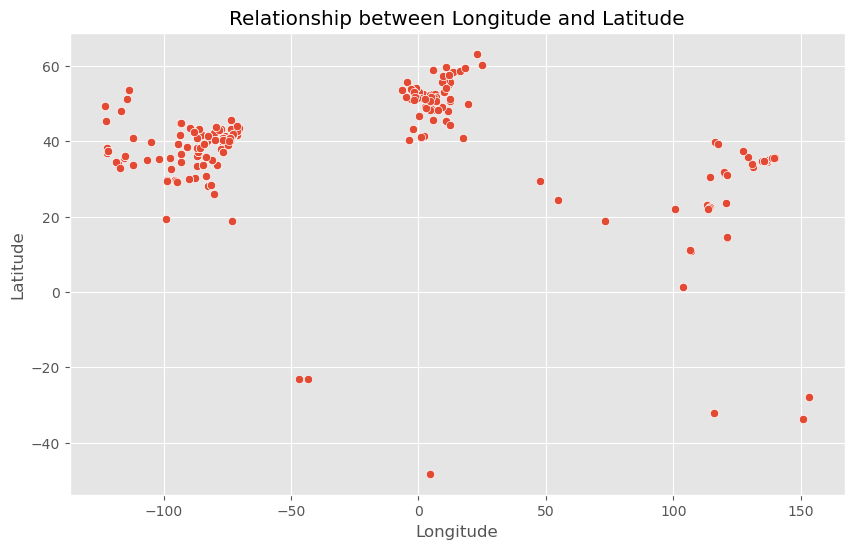

In [141]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=roller3, 
                x='Longitude', 
                y='Latitude', 
                )
plt.title('Relationship between Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

- Most of coasters are grouped in 3 specific locations based on their longitude and latitude

- Show the above correlation in a world map

In [ ]:

import geopandas as gpd

In [ ]:
# Load the geospatial data
world = gpd.read_file("world.shp")

# Create a GeoDataFrame from your dataset
gdf = gpd.GeoDataFrame(roller3, 
                      geometry=gpd.points_from_xy(roller3['Longitude'], roller3['Latitude']))


# Create a map
world.plot(figsize=(12, 8), color='white', edgecolor='black')

# Plot your data points on the map
gdf.plot(ax=plt.gca(), marker='o', color='red', markersize=10, label='Roller Coasters')

# Add a legend
plt.legend()
plt.title('Relationship between Longitude and Latitude on a Map')
plt.show()